#                                    Prediction using Supervised ML -TASK 6
  By:Abirami Somasundaram

###  TASK- Prediction using Decision Tree Algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as Sns
from sklearn import datasets

In [4]:
df=Sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.info()
print("Shape")
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Shape


(150, 5)

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
df.isnull().sum()
y1=df.species

In [13]:
from sklearn.preprocessing import LabelEncoder
le_species=LabelEncoder()
df['species_n']= le_species.fit_transform(df['species'])
df.drop('species',axis=1,inplace=True)
df.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species_n
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [16]:
x=df.drop('species_n',axis=1)
y=df.species_n
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: species_n, dtype: int32

In [27]:
y.tail(10)

140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: species_n, dtype: int32

### Splitting into training and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Decision Tree Algorithm

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)



DecisionTreeClassifier()

In [21]:
dtc.score(X_train,y_train)

1.0

In [22]:
y_pred=dtc.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head()

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


## Metric Evaluation
### Confusion Matrix and Decision Tree

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<AxesSubplot:>

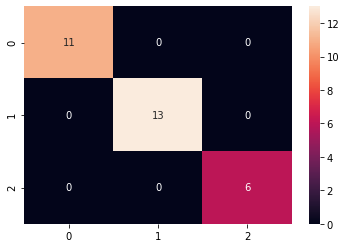

In [24]:
Sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

[Text(558.0, 996.6, 'petal_width <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = virginica'),
 Text(472.15384615384613, 815.4000000000001, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(643.8461538461538, 815.4000000000001, 'petal_width <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = virginica'),
 Text(343.38461538461536, 634.2, 'petal_length <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(171.69230769230768, 453.0, 'petal_width <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(85.84615384615384, 271.79999999999995, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(257.53846153846155, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(515.0769230769231, 453.0, 'petal_width <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(429.23076923076917, 271.79999999999995,

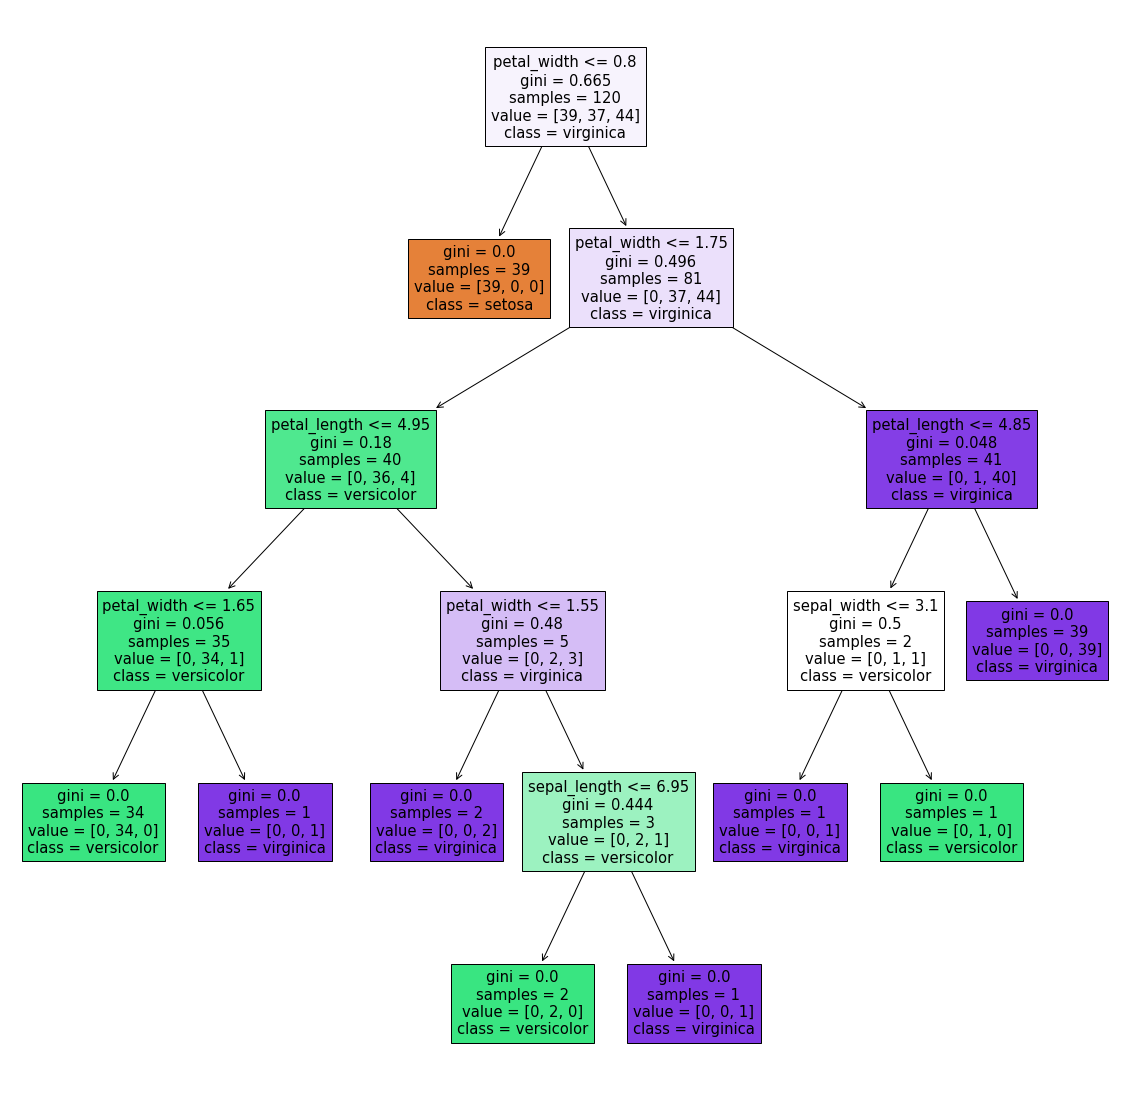

In [26]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dtc,feature_names=x.columns,class_names=y1.unique(),filled=True)